In [5]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns # new library
import matplotlib.pyplot as plt
import numpy as np


## OBJECTIVES

- Comparing the health impacts of different scenarios related to air pollution in different years and age groups to inform effective policymaking.
- Modeling how changes in air pollution levels might affect different diseases or health outcomes over time in a particular area or community

- This study estimates the long-term health impacts of exposure to air pollution in 
London from 2016 to 2050 for three scenarios: a baseline scenario where pollution 
remains at 2016 levels; a “ULEZ” scenario which models the health benefits of the 
central London Ultra Low Emission Zone, expansion to the North and South circular 
roads and tightening of the emissions standards for the Londonwide Low Emission 
Zone for heavy vehicles; and a scenario which models the health benefits of all the 
policies included in the London Environment Strategy.

1st Scenario:  The baseline scenario assumes air pollution levels remain at 2016 levels throughout the period to 2050.
2nd Scenario:  The Ultra Low Emission Zone (ULEZ) includes modelled air quality improvements resulting from the introduction of the central ULEZ in 2019, the tightening of the     restrictions of the Low Emission Zone (LEZ) in 2020, and the expansion of the ULEZ in 2021, as well as additional policy measures in the period 2016-2024.
3rd Scenario:  The London Environment Strategy (LES) scenario which includes modelled air quality improvements as a result of the central ULEZ, LEZ tightening and ULEZ expansion, as well as those resulting from additional policies in the LES over the period 2025-2050. 
4th Scenario: A final scenario was run which reduces exposure to non-anthropogenic levels for the whole population to compute the total number of new diseases attributable man made to air pollution.

## INCIDENCE MERGED FILES FOR ALL LONDON PM25

In [6]:
directory = '../data_unclean/health/PM25'
sheet_name = 'Incidence'

data_frames = []

for filename in os.listdir(directory):
    if filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
 
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)


def combine_ci(series):
    return np.sqrt((series ** 2).sum())


london_PM25_incidence = merged_df.groupby(['Scenario', 'Year', 'Disease', 'AgeGroup'], as_index=False).agg({
    'Incidence': 'sum',
    '95% CL': combine_ci  # Combine 95% CL values
})


print(london_PM25_incidence.head())
output_dir = '../data_clean'
os.makedirs(output_dir, exist_ok=True)

output_file = os.path.join(output_dir, 'london_pm25_incidence.xlsx')
london_PM25_incidence.to_excel(output_file, index=False)

print(f"Data successfully merged and saved to {output_file}")

   Scenario  Year           Disease AgeGroup  Incidence    95% CL
0         0  2016  childhood asthma      0-5       3682  5.744563
1         0  2016  childhood asthma    06-17       5328  5.744563
2         0  2016  childhood asthma    18-64          0  0.000000
3         0  2016  childhood asthma      65+          0  0.000000
4         0  2016  childhood asthma    total       9010  5.744563
Data successfully merged and saved to ../data_clean\london_pm25_incidence.xlsx


## SCENARIO 0 PM25 INCIDENCE FOR ALL LONDON

Disease
childhood asthma                         469688
chronic obstructive pulmonary disease    188020
coronary heart disease                   306302
diabetes                                 955064
low birth weight                         234544
lung cancer                              136698
stroke                                   246128
dtype: int64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\44761798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\44761798.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


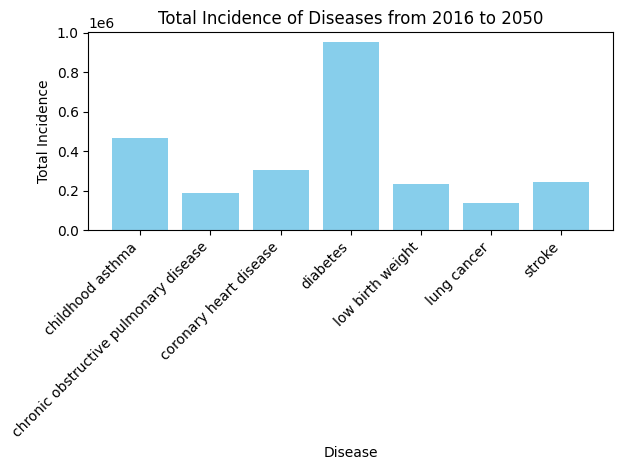

In [27]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]


PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
# NO2_incidence_s0.info()

# NO2_incidence_s0.head()

# NO2_incidence_s0.isnull().sum()

# diseases = NO2_incidence_s0['Disease'].unique()
# diseases


grouped_data = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

grouped_data
total_incidence_per_disease = grouped_data.sum(axis=1)
print(total_incidence_per_disease)


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [8]:
# Total number for all diseases from 2016-2050 INCIDENCE 

grouped_data = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
grouped_data
total_incidence = grouped_data.sum(axis=1)
total_incidence


Disease
total    1268222
dtype: int64

Total number of incidents in 2016: 77794
Total number of incidents in 2050: 67182


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\57262445.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_incidence_s0[PM25_incidence_s0['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

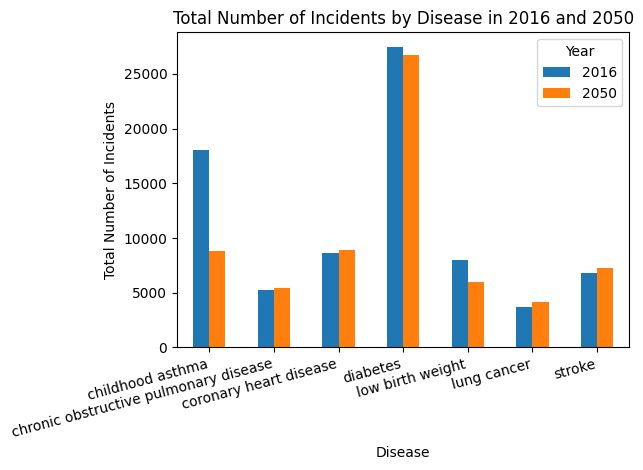

In [31]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE

df_selected_years = PM25_incidence_s0[PM25_incidence_s0['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']
grouped_data
total_2016 = grouped_data['2016-01-01'].sum()
total_2050 = grouped_data['2050-01-01'].sum()
print("Total number of incidents in 2016:", total_2016)
print("Total number of incidents in 2050:", total_2050)

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## SCENARIO 2 PM25 'INCIDENCE' FOR ALL LONDON

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\1539194099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\1539194099.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


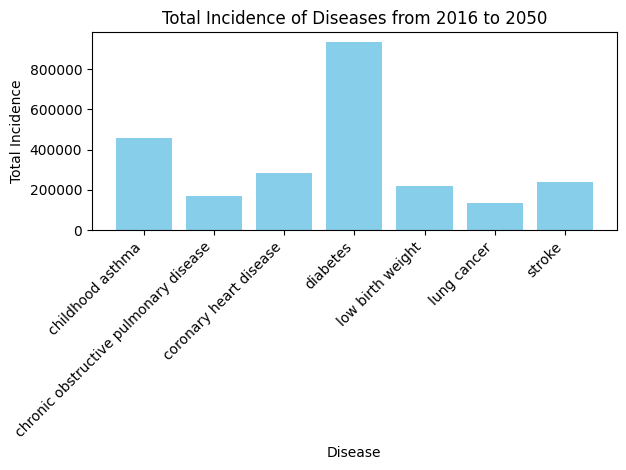

In [10]:
# Total number for each disease by age from 2016-2050 INCIDENCE SCENARIO 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]


PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
# NO2_incidence_s0.info()

# NO2_incidence_s0.head()

# NO2_incidence_s0.isnull().sum()

# diseases = NO2_incidence_s0['Disease'].unique()
# diseases


grouped_data = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

grouped_data
total_incidence_per_disease = grouped_data.sum(axis=1)
total_incidence_per_disease


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence')
ax.set_title('Total Incidence of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\4030746209.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_incidence_s2[PM25_incidence_s2['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

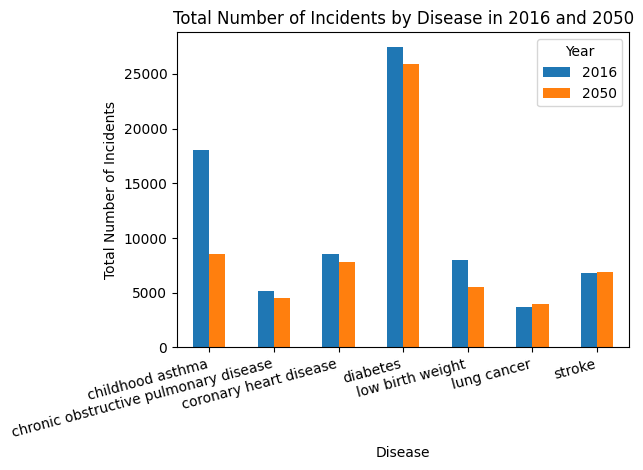

In [11]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE SCENARIO 2

df_selected_years = PM25_incidence_s2[PM25_incidence_s2['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [12]:
# Total number for all diseases from 2016-2050 INCIDENCE SCENARIO 2

grouped_data = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data = grouped_data[grouped_data.index == 'total']
grouped_data
total_incidence = grouped_data.sum(axis=1)
total_incidence

Disease
total    1221769
dtype: int64

## INCIDENCE AVOIDED MERGED FILES FOR ALL LONDON PM25

In [13]:
directory = '../data_unclean/health/PM25'

sheet_name = 'Incidence Cases Avoided'

data_frames = []

for filename in os.listdir(directory):
    if filename.endswith('.xls'):
        file_path = os.path.join(directory, filename)
 
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)


def combine_ci(series):
    return np.sqrt((series ** 2).sum())


london_PM25_avoided = merged_df.groupby(['Scenario', 'Year', 'Disease', 'AgeGroup'], as_index=False).agg({
    'Incidence Cases Avoided': 'sum',
    '95% CL': combine_ci  # Combine 95% CL values
})

print(london_PM25_avoided.head())

output_dir = '../data_clean'
os.makedirs(output_dir, exist_ok=True)

output_file = os.path.join(output_dir, 'london_PM25_avoided.xlsx')
london_PM25_avoided.to_excel(output_file, index=False)

print(f"Data successfully merged and saved to {output_file}")

   Scenario  Year           Disease AgeGroup  Incidence Cases Avoided  \
0         1  2016  childhood asthma      0-5                       -3   
1         1  2016  childhood asthma    06-17                        7   
2         1  2016  childhood asthma    18-64                        0   
3         1  2016  childhood asthma      65+                        0   
4         1  2016  childhood asthma    total                        4   

     95% CL  
0  5.744563  
1  5.744563  
2  0.000000  
3  0.000000  
4  5.744563  
Data successfully merged and saved to ../data_clean\london_PM25_avoided.xlsx


## SCENARIO 2 PM25 'INCIDENCE AVOIDED' FOR ALL LONDON

Disease
childhood asthma                         11124
chronic obstructive pulmonary disease    18740
coronary heart disease                   22650
diabetes                                 18738
low birth weight                         12426
lung cancer                               2722
stroke                                    6506
dtype: int64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\369414621.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_avoided_s2['Year'] = pd.to_datetime(london_PM25_avoided['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\369414621.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')


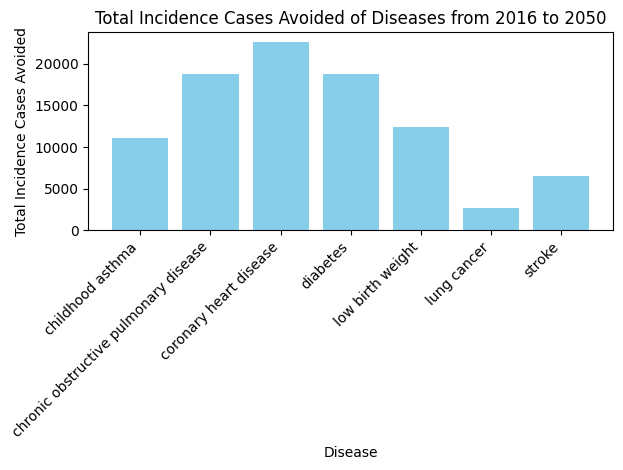

In [25]:
# Total number for each disease between 2016-2050 INCIDENCE AVOIDED

# london_NO2_avoided

# Total number for each disease by age from 2016-2050 INCIDENCE
PM25_avoided_s2 = london_PM25_avoided[london_PM25_avoided['Scenario'] == 2]
PM25_avoided_s2['Year'] = pd.to_datetime(london_PM25_avoided['Year'], format='%Y')
PM25_avoided_s2
# NO2_avoided_s0.info()
# NO2_avoided_s0.head()
# NO2_avoided_s0.isnull().sum()
# diseases = NO2_avoided_s0['Disease'].unique()
# diseases
# NO2_avoided_s0.isna().sum()
# NO2_avoided_s0.keys()

# NO2_avoided_s0
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index != 'total']

grouped_avoided
total_incidence_per_disease = grouped_avoided.sum(axis=1)
print(total_incidence_per_disease)


fig, ax = plt.subplots()
ax.bar(total_incidence_per_disease.index, total_incidence_per_disease.values, color='skyblue')
ax.set_xlabel('Disease')
ax.set_ylabel('Total Incidence Cases Avoided')
ax.set_title('Total Incidence Cases Avoided of Diseases from 2016 to 2050')
ax.set_xticklabels(total_incidence_per_disease.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()





In [15]:
# TOTAL ALL DISEASES
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = PM25_avoided_s2.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_avoided = grouped_avoided[grouped_avoided.index == 'total']
total_incidence = grouped_avoided.sum(axis=1)
total_incidence

Disease
total    46453
dtype: int64

C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\637791460.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_selected_years = PM25_avoided_s2[PM25_avoided_s2['Year'].isin(['2016', '2050'])]


<Figure size 1200x800 with 0 Axes>

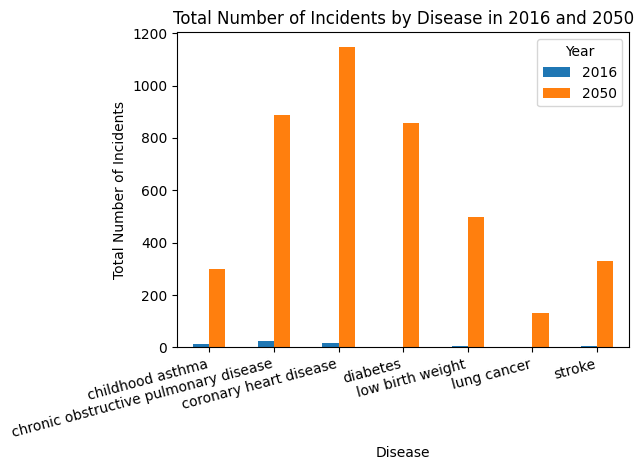

In [16]:
# DIFFERENCE BETWEEN 2016 AND 2050 FOR EACH DISEASE , NO AGE, INCIDENCE AVOIDED

df_selected_years = PM25_avoided_s2[PM25_avoided_s2['Year'].isin(['2016', '2050'])]

# Group the data by Disease and Year, and sum the Incidence values
grouped_data = df_selected_years.groupby(['Disease', 'Year'])['Incidence Cases Avoided'].sum().unstack()
grouped_data = grouped_data[grouped_data.index != 'total']

plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title('Total Number of Incidents by Disease in 2016 and 2050')
plt.xlabel('Disease')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=15, ha='right')  # Rotate x-axis labels for better readability
plt.legend(labels=['2016', '2050'], title='Year')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## PERCENTAGE PER DISEASE DECREASE/INCREASE. COMPARE SCENARIO 0 AND 2 FOR PM25

In [17]:
# i need totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index != 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index != 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)


Disease
childhood asthma                         458564
chronic obstructive pulmonary disease    169280
coronary heart disease                   283652
diabetes                                 936326
low birth weight                         222118
lung cancer                              133976
stroke                                   239622
dtype: int64 Disease
childhood asthma                         469688
chronic obstructive pulmonary disease    188020
coronary heart disease                   306302
diabetes                                 955064
low birth weight                         234544
lung cancer                              136698
stroke                                   246128
dtype: int64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\1136577884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\1136577884.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


In [23]:
# i need totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

Disease
total    1221769
dtype: int64 Disease
total    1268222
dtype: int64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\782639930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\782639930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


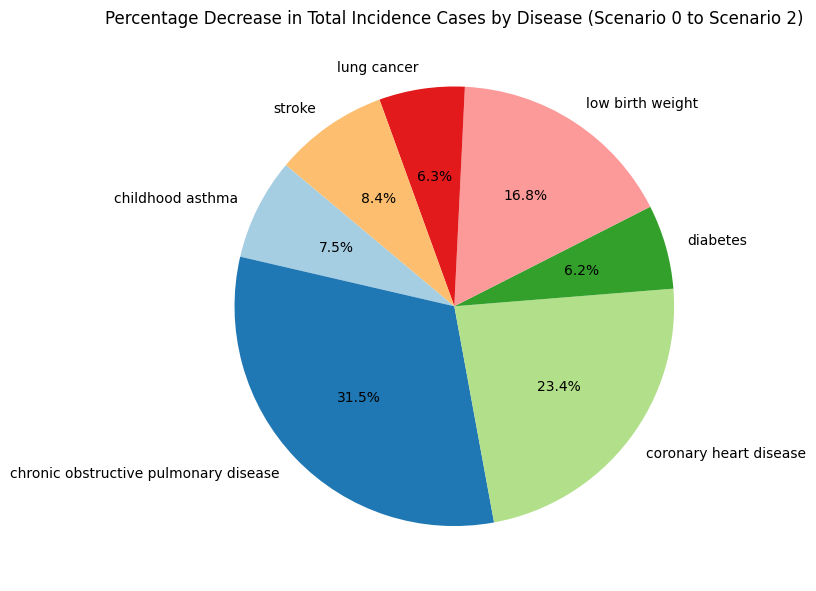

In [18]:
percentage_change = ((total_incidence_per_disease_2 - total_incidence_per_disease_0) / total_incidence_per_disease_0) * 100

# Prepare data for the pie chart
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

# # Plotting the pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(positive_change, labels=positive_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# plt.title('Percentage Increase in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.figure(figsize=(8, 8))
plt.pie(negative_change.abs(), labels=negative_change.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Decrease in Total Incidence Cases by Disease (Scenario 0 to Scenario 2)')

plt.tight_layout()
plt.show()


In [19]:
# Total change for each disease
absolute_change_per_disease = total_incidence_per_disease_2 - total_incidence_per_disease_0
print("Absolute Change in Total Incidence Cases for Each Disease:")
print(absolute_change_per_disease)


Absolute Change in Total Incidence Cases for Each Disease:
Disease
childhood asthma                        -11124
chronic obstructive pulmonary disease   -18740
coronary heart disease                  -22650
diabetes                                -18738
low birth weight                        -12426
lung cancer                              -2722
stroke                                   -6506
dtype: int64


## TOTALS 'coronary heart disease', 'childhood asthma', 'lung cancer'  PM25, DIFFERENCE BETWEEN 0 AND 2 SCENARIO

In [20]:
## TOTAL CHANGE FOR ASTHMAS , DEMENTIA, LUNG CANCER

selected_diseases = ['coronary heart disease', 'childhood asthma', 'lung cancer']

absolute_change_selected = absolute_change_per_disease[selected_diseases]

total_decrease = absolute_change_selected[absolute_change_selected < 0].sum()

print("Total Number of Decrease for Selected Diseases:")
print(total_decrease * -1)


Total Number of Decrease for Selected Diseases:
36496


## PERCENTAGE ALL DIESEASE DECREASE. COMPARE SCENARIO 0 AND 2 FOR PM25

In [21]:
# i need totals of each disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals of each disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)




Disease
total    1221769
dtype: int64 Disease
total    1268222
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.662845
dtype: float64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\416060684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\416060684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


## PERCENTAGE ALL DIESEASE DECREASE. COMPARE SCENARIO 0 AND 2 FOR NO2

Disease
total    1221769
dtype: int64 Disease
total    1268222
dtype: int64
Percentage Change for All Diseases' Decrease:
Disease
total   -3.662845
dtype: float64


C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\2355157791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
C:\Users\MagdalenaKrasicka\AppData\Local\Temp\ipykernel_16312\2355157791.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')


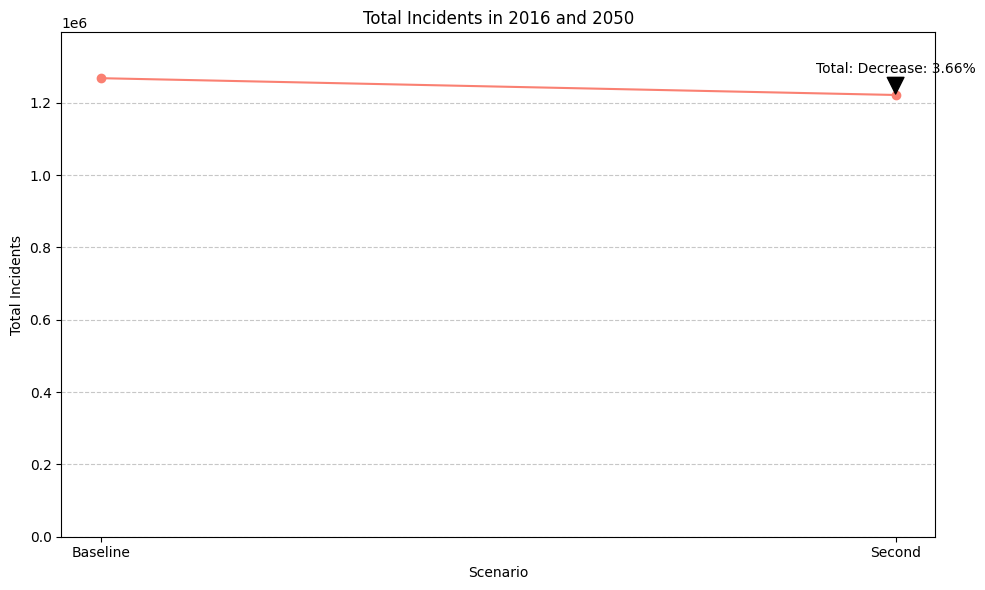

In [22]:
# i need totals for all disease from 2016-2050 for scenario 0
PM25_incidence_s0 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 0]
PM25_incidence_s0['Year'] = pd.to_datetime(PM25_incidence_s0['Year'], format='%Y')
grouped_data_0 = PM25_incidence_s0.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_0 = grouped_data_0[grouped_data_0.index == 'total']
total_incidence_per_disease_0 = grouped_data_0.sum(axis=1)
total_incidence_per_disease_0
# i need totals for all disease from 2016-2050 for scenario 2
PM25_incidence_s2 = london_PM25_incidence[london_PM25_incidence['Scenario'] == 2]
PM25_incidence_s2['Year'] = pd.to_datetime(PM25_incidence_s2['Year'], format='%Y')
grouped_data_2 = PM25_incidence_s2.groupby(['Disease', 'Year'])['Incidence'].sum().unstack()
grouped_data_2 = grouped_data_2[grouped_data_2.index == 'total']
total_incidence_per_disease_2 = grouped_data_2.sum(axis=1)
print(total_incidence_per_disease_2, total_incidence_per_disease_0)

# Calculate the absolute decrease in total incidence cases
absolute_decrease = total_incidence_per_disease_2 - total_incidence_per_disease_0

# Calculate the percentage change for all diseases' decrease
percentage_change_decrease = ((absolute_decrease) / total_incidence_per_disease_0) * 100

# Print the percentage change for all diseases' decrease
print("Percentage Change for All Diseases' Decrease:")
print(percentage_change_decrease)

scenarios = ['Baseline', 'Second']
totals = [total_incidence_per_disease_0.iloc[0], total_incidence_per_disease_2.iloc[0]]

# Plotting the total incidents for Scenario 0 and Scenario 2
plt.figure(figsize=(10, 6))
plt.plot(scenarios, totals, marker='o', linestyle='-', color='salmon')
plt.title('Total Incidents in 2016 and 2050')
plt.xlabel('Scenario')
plt.ylabel('Total Incidents')
plt.ylim(0, max(totals) * 1.1)  # Adjust the y-axis limit to make the chart more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating the plot with percentage change for each disease's decrease
for i, disease in enumerate(total_incidence_per_disease_0.index):
    absolute_change = total_incidence_per_disease_2.loc[disease] - total_incidence_per_disease_0.loc[disease]
    percentage_change = ((absolute_change) / total_incidence_per_disease_0.loc[disease]) * 100
    if percentage_change < 0:
        decrease_annotation = f'{disease.capitalize()}: Decrease: {abs(percentage_change):.2f}%'
        plt.annotate(decrease_annotation, xy=('Second', total_incidence_per_disease_2.loc[disease]), xytext=('Second', total_incidence_per_disease_2.loc[disease] * 1.05),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     horizontalalignment='center')

plt.tight_layout()
plt.show()